<a href="https://colab.research.google.com/github/hibscolony/Tubes_AI_FuzzyLogic/blob/main/Real-Estate_Valuation_With_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 20px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        🌟  Prediksi Tinggi Harga Rumah Menggunakan Fuzzy Logic Berdasarkan Usia Rumah dan Jarak ke Stasiun MRT Terdekat 🔍
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">





## 🐛 Kelompok 1 DS-47-03

- ⛄ Naufal Arkan Wahib - 103052300009
- ⛄ Hanif Imaduddin - 103052300105
- ⛄ Gabriel Edbert Liandrew - 103052330006


## 🐇  Pendahuluan

Proyek ini bertujuan untuk mengembangkan dan membandingkan dua model Fuzzy Logic, yaitu Mamdani dan Sugeno, dalam memprediksi tinggi harga rumah. Sistem ini akan mempertimbangkan dua variabel utama: usia rumah (house_age) dan jarak ke stasiun MRT terdekat (distance to the nearest MRT station). Berdasarkan nilai-nilai ini, sistem akan menentukan kategori harga rumah (house price) menjadi tinggi, sedang, atau rendah

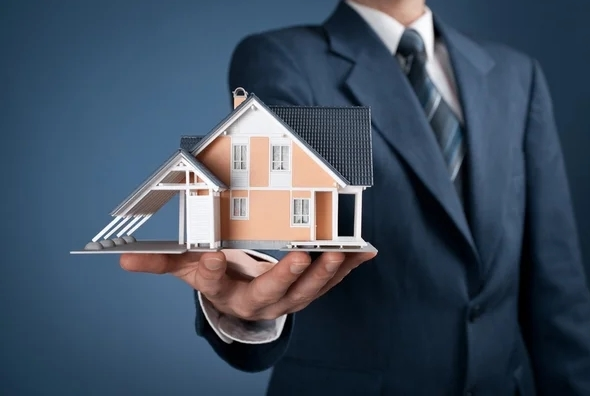

Harga rumah dipengaruhi oleh berbagai faktor, termasuk usia rumah dan jarak ke fasilitas umum seperti stasiun MRT. Dalam dunia nyata, hubungan antara variabel-variabel ini sering kali tidak linier dan penuh ketidakpastian. Oleh karena itu, metode Fuzzy Logic sangat cocok untuk menangani kompleksitas ini karena mampu memberikan rekomendasi harga dengan realistis dibandingkan metode tradisional.

## Analisis Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Train Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Real estate valuation data set.xlsx to Real estate valuation data set.xlsx


Dataset yang digunakan ialah kumpulan data historis pasar penilaian real estat dikumpulkan dari Sindian Dist., New Taipei City, Taiwan. Berikut tautan untuk mengakses datanya: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

In [3]:
df = pd.read_excel('/content/Real estate valuation data set.xlsx')
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [4]:
# melihat deskripsi dan informasi dari dataset yang digunakan
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
# modifikasi dataset untuk menghilangkan X1, X2, dan seterusnya
df.columns = [col.split(' ', 1)[-1] for col in df.columns]

# menghapus kolom 'No'
df = df.drop(columns=['No'])

# menampilkan 10 record paling akhir berdasarkan index
df.tail(10)

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
404,2013.333333,16.4,289.32480,5,24.98203,121.54348,41.2
405,2012.666667,23.0,130.99450,6,24.95663,121.53765,37.2
406,2013.166667,1.9,372.13860,7,24.97293,121.54026,40.5
407,2013.000000,5.2,2408.99300,0,24.95505,121.55964,22.3
408,2013.416667,18.5,2175.74400,3,24.96330,121.51243,28.1
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


Melihat persebaran data dalam kolom house age dan distance to the nearest MRT station menggunakan boxplot

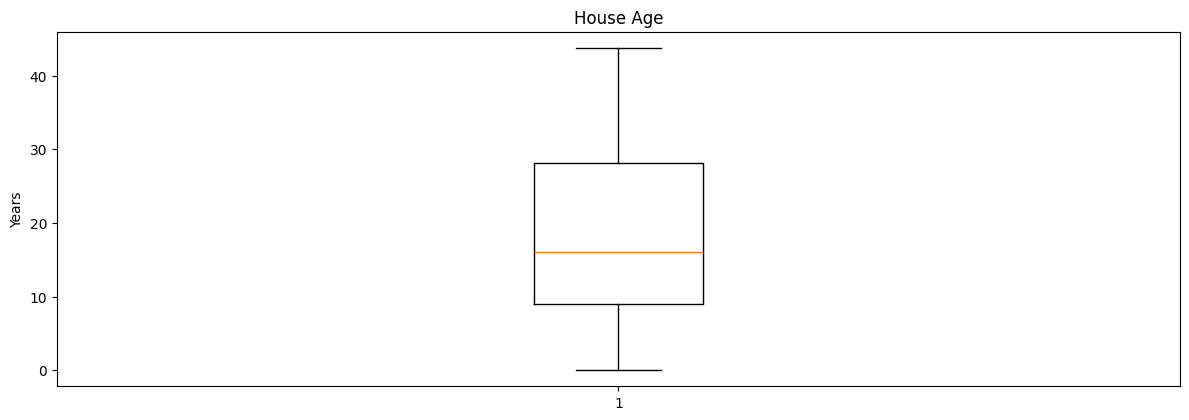

In [6]:
# Boxplot untuk 'house age'
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.boxplot(df['house age'])
plt.title('House Age')
plt.ylabel('Years')

plt.tight_layout()
plt.show()

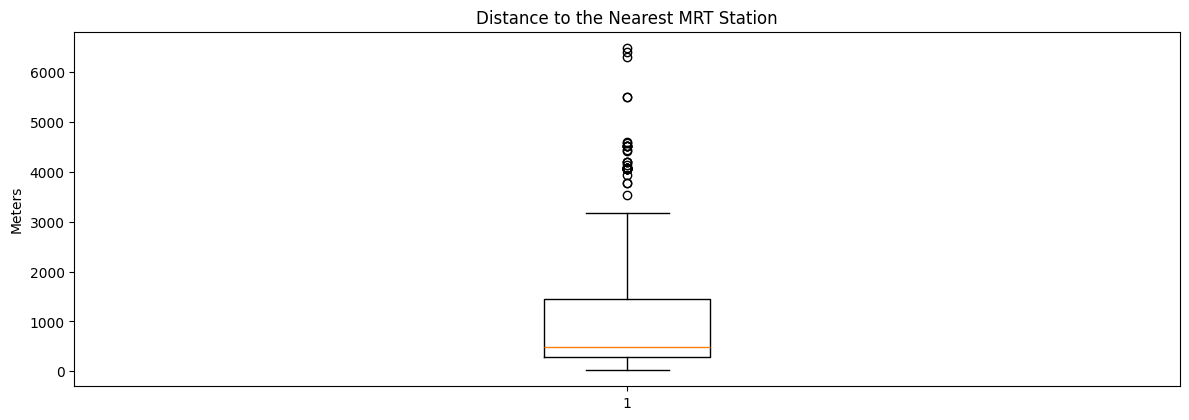

In [7]:
# Boxplot untuk 'distance to the nearest MRT station'
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.boxplot(df['distance to the nearest MRT station'])
plt.title('Distance to the Nearest MRT Station')
plt.ylabel('Meters')

plt.tight_layout()
plt.show()

Melihat persebaran data menggunakan histogram untuk kolom house age dan distance to the nearest MRT station

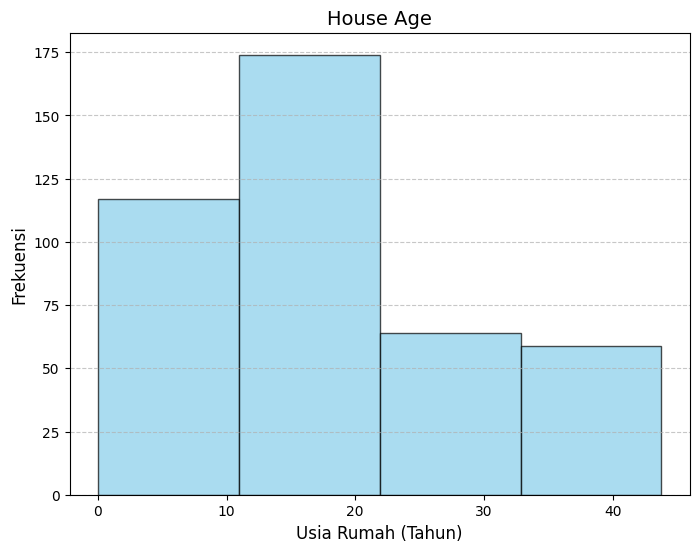

In [8]:
# histogram untuk house age
plt.figure(figsize=(8, 6))
plt.hist(df['house age'], bins=4, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('House Age', fontsize=14)
plt.xlabel('Usia Rumah (Tahun)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

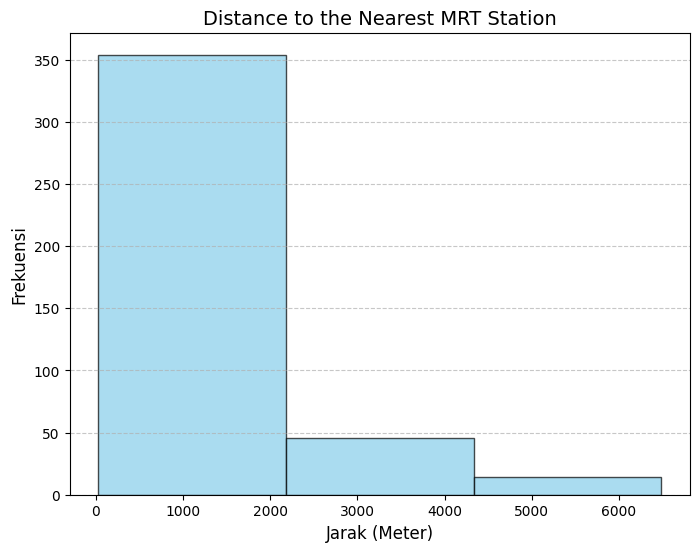

In [9]:
# histogram untuk distance to the nearest MRT station
plt.figure(figsize=(8, 6))
plt.hist(df['distance to the nearest MRT station'], bins=3, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distance to the Nearest MRT Station', fontsize=14)
plt.xlabel('Jarak (Meter)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Membuat kategori harga rumah menggunakan kolom house price of unit area menjadi kategori murah, sedang, dan mahal

In [10]:
# membagi kategori harga berdasarkann kolom 'house price of unit area'
kategori_harga = pd.qcut(df['house price of unit area'], q=3, labels=['Murah', 'Sedang', 'Mahal'])
df['kategori_harga'] = kategori_harga

print(df['kategori_harga'].value_counts())
df.head(4)

kategori_harga
Murah     141
Mahal     137
Sedang    136
Name: count, dtype: int64


,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,kategori_harga
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,Sedang
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,Sedang
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,Mahal
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,Mahal


In [11]:
# Mengecek kategori melalui nilai minimum dan maksimum untuk setiap kategori
print("Nilai minimum di kategori murah adalah: ",df['house price of unit area'][df['kategori_harga']== 'Murah'].min(),"\nNilai maksimum di kategori murah adalah: ",df['house price of unit area'][df['kategori_harga']== 'Murah'].max())
print("Nilai minimum di kategori sedang adalah: ",df['house price of unit area'][df['kategori_harga']== 'Sedang'].min(),"\nNilai maksimum di kategori sedang adalah: ",df['house price of unit area'][df['kategori_harga']== 'Sedang'].max())
print("Nilai minimum di kategori mahal adalah: ",df['house price of unit area'][df['kategori_harga']== 'Mahal'].min(),"\nNilai maksimum di kategori mahal adalah: ",df['house price of unit area'][df['kategori_harga']== 'Mahal'].max())

Nilai minimum di kategori murah adalah:  7.6 
Nilai maksimum di kategori murah adalah:  31.3
Nilai minimum di kategori sedang adalah:  31.5 
Nilai maksimum di kategori sedang adalah:  43.1
Nilai minimum di kategori mahal adalah:  43.2 
Nilai maksimum di kategori mahal adalah:  117.5


## Fuzzy Logic

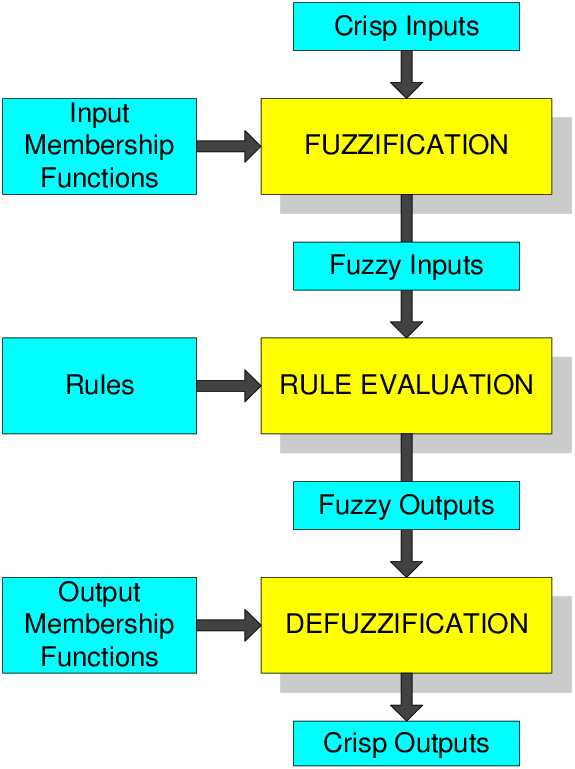

Fuzzy logic adalah metode reasoning yang meniru cara manusia membuat keputusan berdasarkan informasi yang tidak pasti atau tidak tepat. Fuzzy logic memungkinkan nilai kebenaran variabel berkisar antara 0 dan 1, berbeda dengan logika klasik yang hanya mengizinkan nilai kebenaran 0 atau 1.

Cara Kerja Fuzzy Logic
1. Fuzzyfikasi: Proses ini mengubah input yang jelas (crisp input) menjadi nilai fuzzy dengan menggunakan fungsi keanggotaan.
2. Inference: Pada tahap ini, aturan-aturan fuzzy diterapkan untuk menghasilkan output fuzzy. Aturan-aturan ini biasanya berbentuk "jika-maka" (if-then).
3. Defuzzyfikasi: Proses ini mengubah output fuzzy menjadi nilai yang jelas (crisp output atau weight output).

Dua Model Fuzzy Logic
1. Model Mamdani: Model ini menggunakan aturan berbasis fuzzy dan cocok untuk aplikasi yang memerlukan interpretasi manusia. Proses inference pada model Mamdani melibatkan fuzzyfikasi input, penerapan aturan fuzzy, agregasi hasil, dan defuzzyfikasi. Output fuzzy dihasilkan dari agregasi aturan fuzzy dan kemudian di-defuzzyfikasi menggunakan metode seperti centroid atau bisektor

2. Model Sugeno: Model ini menggunakan fungsi output yang lebih sederhana dan sering digunakan dalam sistem kontrol adaptif. Proses inference pada model Sugeno mirip dengan Mamdani, tetapi outputnya adalah fungsi linear atau konstanta. Output fuzzy langsung dihitung menggunakan fungsi linear atau konstanta, sehingga proses defuzzyfikasi lebih sederhana.

### Fuzzyfikasi

Pembuatan derajat keanggotaan untuk kolom yang akan dianalisis, yakni untuk kolom house age dan kolom distance to the nearest MRT station

#### Fungsi Keanggotaan Berdasarkan Usia Rumah

In [12]:
#Fungsi keanggotaan usia rumah baru
def house_age_baru(usia):
  if usia <= 3:
    return 1
  elif usia <= 6:
    return (6-usia)/(6-3)
  else:
    return 0

#Fungsi keanggotaan usia rumah muda
def house_age_muda(usia):
  if usia > 3 and usia <= 6:
    return (usia-3)/(6-3)
  elif usia > 6 and usia <= 8:
    return 1
  elif usia > 8 and usia <= 13:
    return (13-usia)/(13-8)
  else:
    return 0

#Fungsi keanggotaan usia rumah sedang
def house_age_sedang(usia):
  if usia > 8 and usia <= 13:
    return (usia-8)/(13-8)
  elif usia > 13 and usia <= 18:
    return 1
  elif usia > 18 and usia <= 30:
    return (30-usia)/(30-18)
  else:
    return 0

#Fungsi keanggotaan usia rumah tua
def house_age_tua(usia):
  if usia > 30:
    return 1
  elif usia > 18 and usia <= 30:
    return (usia-18)/(30-18)
  else:
    return 0


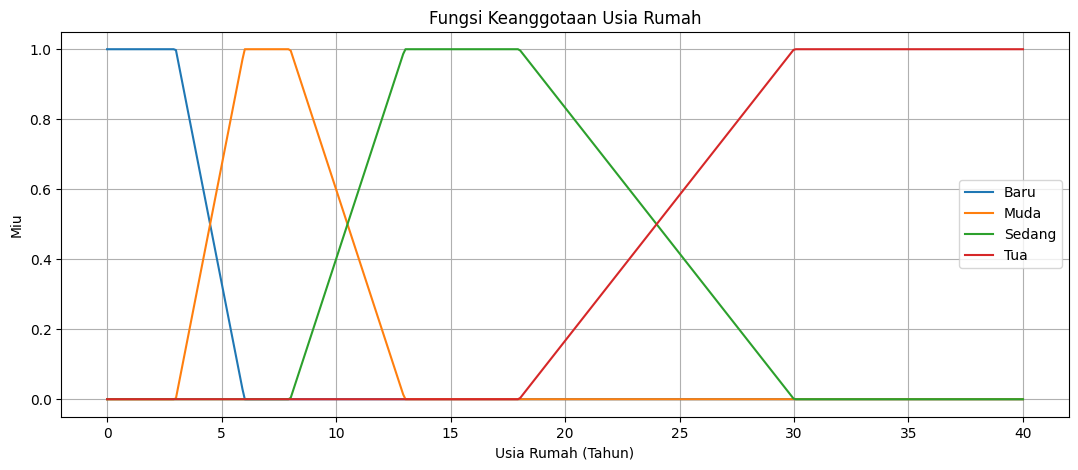

In [13]:
# Menampilkan grafik fuzzyfikasi untuk kolom house age
usia_house_age = np.linspace(0, 40, 400)

anggota_house_age_baru = [house_age_baru(usia) for usia in usia_house_age]
anggota_house_age_muda = [house_age_muda(usia) for usia in usia_house_age]
anggota_house_age_sedang = [house_age_sedang(usia) for usia in usia_house_age]
anggota_house_age_tua = [house_age_tua(usia) for usia in usia_house_age]

plt.figure(figsize=(13, 5))
plt.plot(usia_house_age, anggota_house_age_baru, label='Baru')
plt.plot(usia_house_age, anggota_house_age_muda, label='Muda')
plt.plot(usia_house_age, anggota_house_age_sedang, label='Sedang')
plt.plot(usia_house_age, anggota_house_age_tua, label='Tua')
plt.title('Fungsi Keanggotaan Usia Rumah')
plt.xlabel('Usia Rumah (Tahun)')
plt.ylabel('Miu')
plt.legend()
plt.grid(True)
plt.show()

#### Fungsi Keanggotaan untuk Jarak ke Stasiun MRT

In [14]:
# Fungsi keanggotaan untuk jarak dekat
def distance_dekat(jarak):
    if jarak <= 289:
        return 1
    elif jarak > 289 and jarak <= 339:
        return (339 - jarak) / (339 - 289)
    else:
        return 0

# Fungsi keanggotaan untuk jarak sedang
def distance_sedang(jarak):
    if jarak > 289 and jarak <= 339:
        return (jarak - 289) / (339 - 289)
    elif jarak > 339 and jarak <= 733:
        return 1
    elif jarak > 733 and jarak <= 1454:
        return (1454 - jarak) / (1454 - 733)
    else:
        return 0

# Fungsi keanggotaan untuk jarak jauh
def distance_jauh(jarak):
    if jarak >= 1454:
        return 1
    elif jarak > 733 and jarak <= 1454:
        return (jarak - 733) / (1454 - 733)
    else:
        return 0


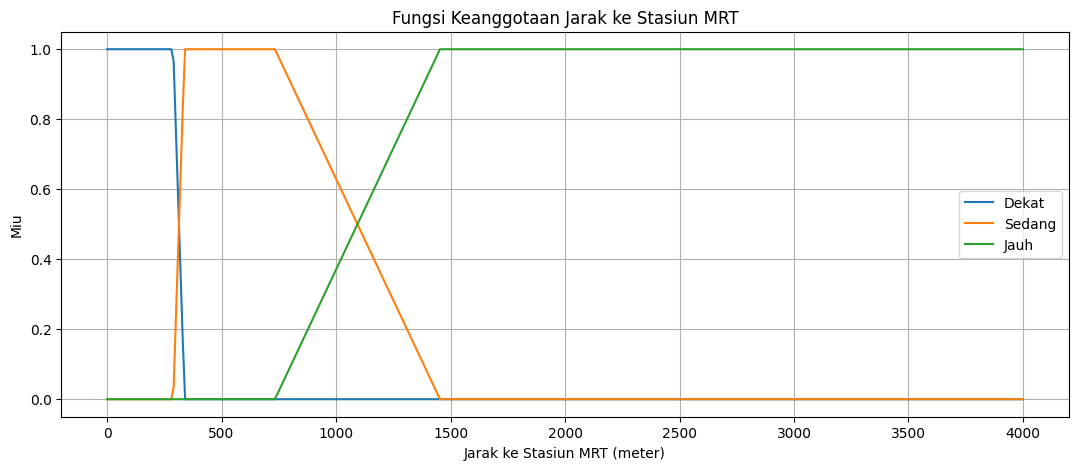

In [15]:
# Menampilkan grafik untuk fuzzyfikasi kolom distance to the nearest MRT station
jarak_distance = np.linspace(0, 4000, 400)

anggota_distance_dekat = [distance_dekat(jarak) for jarak in jarak_distance]
anggota_distance_sedang = [distance_sedang(jarak) for jarak in jarak_distance]
anggota_distance_jauh = [distance_jauh(jarak) for jarak in jarak_distance]

plt.figure(figsize=(13, 5))
plt.plot(jarak_distance, anggota_distance_dekat, label='Dekat')
plt.plot(jarak_distance, anggota_distance_sedang, label='Sedang')
plt.plot(jarak_distance, anggota_distance_jauh, label='Jauh')
plt.title('Fungsi Keanggotaan Jarak ke Stasiun MRT')
plt.xlabel('Jarak ke Stasiun MRT (meter)')
plt.ylabel('Miu')
plt.legend()
plt.grid(True)
plt.show()

Aturan Fuzzy untuk Harga Rumah

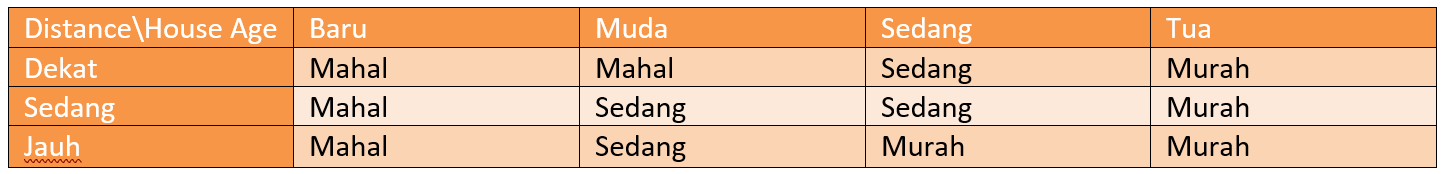

### Inference

#### Proses Inference Berdasarkan Aturan Fuzzy Harga Rumah

In [16]:
# Fungsi inference
def fuzzy_inference(house_age, distance):
    # Hitung keanggotaan input
    baru = house_age_baru(house_age)
    muda = house_age_muda(house_age)
    sedang = house_age_sedang(house_age)
    tua = house_age_tua(house_age)

    dekat = distance_dekat(distance)
    sedang_dist = distance_sedang(distance)
    jauh = distance_jauh(distance)

    # Aturan fuzzy
    rules = {
        "mahal": [
            min(baru, dekat),
            min(muda, dekat),
            min(baru, sedang_dist),
            min(baru, jauh)
        ],
        "sedang": [
            min(muda, sedang_dist),
            min(sedang, dekat),
            min(sedang, sedang_dist),
            min(muda, jauh)
        ],
        "murah": [
            min(sedang, jauh),
            min(tua, dekat),
            min(tua, sedang_dist),
            min(tua, jauh)
        ]
    }

    # Agregasi output
    mahal = max(rules["mahal"])
    sedang = max(rules["sedang"])
    murah = max(rules["murah"])

    return {"Mahal": mahal, "Sedang": sedang, "Murah": murah}



### Defuzzyfikasi

In [17]:
#Fungsi Keanggotaan Output Fuzzy
def anggota_mahal(input):
  if input >= 46:
    return 1
  elif input >= 43 and input < 46:
    return (input - 43) / (46 - 43)
  else:
    return 0

def anggota_sedang(input):
  if input > 27 and input <= 32:
    return (input - 27) / (32 - 27)
  elif input > 32 and input <= 43:
    return 1
  elif input > 43 and input <= 46:
    return (46 - input) / (46 - 43)
  else:
    return 0

def anggota_murah(input):
  if input <= 27:
    return 1
  elif input <= 32 and input > 27:
    return (32 - input) / (32 - 27)
  else:
    return 0


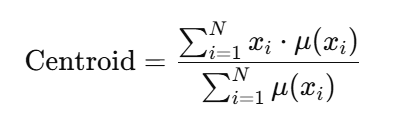

In [18]:
#Defuzzyfikasi Centroid
def defuzzyfikasi(output):
  x = np.linspace(0, 100, 1000)
  aggregrated = np.zeros_like(x)

  #Agregasi keanggotaan
  for i in range(len(x)):
    aggregrated[i] = max(
        min(output["Mahal"], anggota_mahal(x[i])),
        min(output["Sedang"], anggota_sedang(x[i])),
        min(output["Murah"], anggota_murah(x[i]))
    )

  #Hitung centroid
  numerator = np.sum(x * aggregrated)
  denominator = np.sum(aggregrated)

  centroid = numerator / denominator

  return centroid

# Fuzzy Mamdani

Fuzzy mamdani merupakan salah satu metode yang sangat fleksibel dan memiliki toleransi pada data yang ada. Fuzzy mamdani memiliki kelebihan yakni, lebih intuitif, diterima oleh banyak pihak. Penggunaan fuzzy mamdani ini sama halnya dengan penggunaan metode peramalan pada bidang statistik.

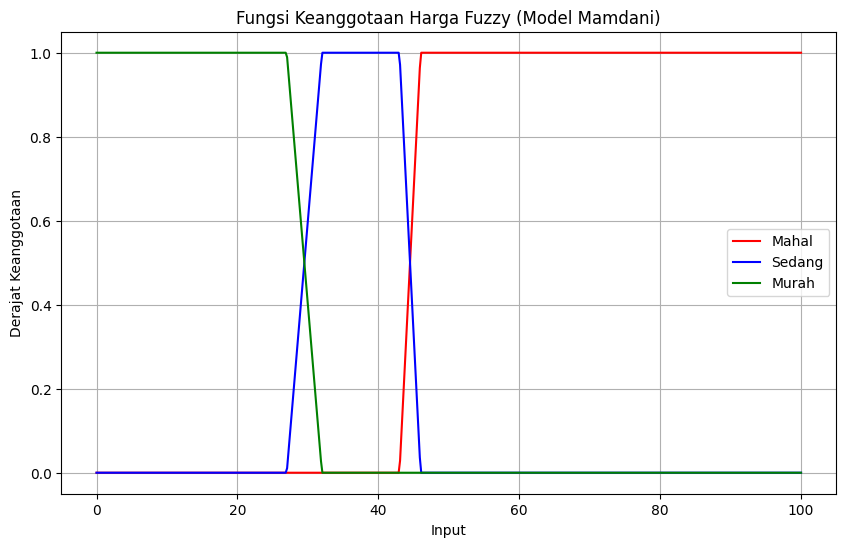

In [19]:
x = np.linspace(0, 100, 500)
y_mahal = [anggota_mahal(val) for val in x]
y_sedang = [anggota_sedang(val) for val in x]
y_murah = [anggota_murah(val) for val in x]

# Plotting the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x, y_mahal, label="Mahal", color="red")
plt.plot(x, y_sedang, label="Sedang", color="blue")
plt.plot(x, y_murah, label="Murah", color="green")
plt.title("Fungsi Keanggotaan Harga Fuzzy (Model Mamdani)")
plt.xlabel("Input")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
def classify_price(row):
    # Hitung fuzzy output berdasarkan 'house age' dan 'distance to the nearest MRT station'
    output = fuzzy_inference(row['house age'], row['distance to the nearest MRT station'])

    # Kategori harga berdasarkan keanggotaan maksimum
    output_category = max(output, key=output.get)
    centroid = defuzzyfikasi(output)
    return centroid

df['Model Mamdani'] = df.apply(classify_price, axis=1)
df.head(20)

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,kategori_harga,Model Mamdani
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,Sedang,14.760257
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,Sedang,31.167194
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,Mahal,36.955582
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,Mahal,36.955582
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,Sedang,59.305766
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1,Sedang,36.955582
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3,Sedang,14.760257
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7,Mahal,30.095387
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8,Murah,14.760257
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1,Murah,14.760257


# Fuzzy Takagi Sugeno Kang

Pada model Sugeno, tahap fuzzification dan tahap memperoleh fuzzy set harga sama dengan yang dilakukan pada model mamdani, oleh karena itu pada model Sugeno ini kami akan menggunakan fungsi-fungsi yang sudah dibuat sebelumnya untuk melakukan fuzzification dan mendapatkan fuzzy set harga

In [21]:
def anggota_mahal_sugeno(harga):
    if (harga == 46):
        return 1
    else:
        return 0
def anggota_sedang_sugeno(harga):
    if (harga == 38):
        return 1
    else:
        return 0
def anggota_murah_sugeno(harga):
    if (harga == 27):
        return 1
    else:
        return 0


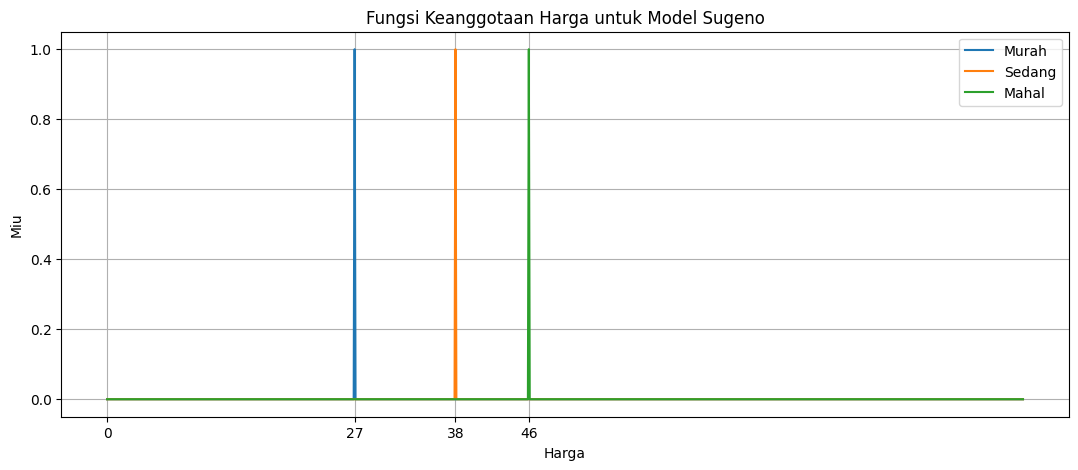

In [22]:
# Menampilkan fungsi keanggotaan untuk output
price_range = np.arange(0,100,0.1)
murah_ = [anggota_murah_sugeno(harga) for harga in price_range]
sedang_ = [anggota_sedang_sugeno(harga) for harga in price_range]
mahal_ = [anggota_mahal_sugeno(harga) for harga in price_range]

plt.figure(figsize=(13, 5))
plt.plot(price_range, murah_, label='Murah')
plt.plot(price_range, sedang_, label='Sedang')
plt.plot(price_range, mahal_, label='Mahal')
plt.title('Fungsi Keanggotaan Harga untuk Model Sugeno')
plt.xlabel('Harga')
plt.xticks([0,27,38,46])
plt.ylabel('Miu')
plt.legend()
plt.grid(True)
plt.show()

Rumus perhitungan defuzzyfikasi model sugeno menggunakan weight average

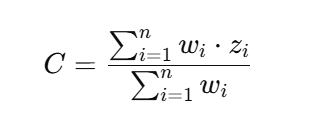

In [23]:
# Fungsi rata-rata bobot
def weighted_average(fuzzy_sets):
    total = fuzzy_sets['Murah'] + fuzzy_sets['Sedang'] + fuzzy_sets['Mahal']
    if total == 0:  # Tangani kasus nol
        return 0  # Atau berikan nilai default seperti rata-rata keseluruhan, misalnya 50
    return (fuzzy_sets['Murah'] * 27 +
            fuzzy_sets['Sedang'] * 38 +
            fuzzy_sets['Mahal'] * 46) / total

def prediksi_dengan_model_sugeno(umur_rumah,jarak):
  fuzzy_sets = fuzzy_inference(umur_rumah,jarak)
  return weighted_average(fuzzy_sets)

In [24]:
# Melakukan pengecekan output inferensi
print(fuzzy_inference(21,84.832839))
print(fuzzy_inference(5.5,10))
print(fuzzy_inference(17.9,1783.18000	))

{'Mahal': 0, 'Sedang': 0.75, 'Murah': 0.25}
{'Mahal': 0.8333333333333334, 'Sedang': 0, 'Murah': 0}
{'Mahal': 0, 'Sedang': 0, 'Murah': 1}


In [25]:
#Klasifikasi harga
def classify_price_sugeno(row):
    # Hitung fuzzy output berdasarkan 'house age' dan 'distance to the nearest MRT station'
    fuzzy_sets = fuzzy_inference(row['house age'], row['distance to the nearest MRT station'])
    # Kategori harga berdasarkan keanggotaan maksimum
    output_category = max(fuzzy_sets, key=fuzzy_sets.get)
    # Hitung rata-rata berbobot berdasarkan hasil Sugeno
    weight_output = prediksi_dengan_model_sugeno(row['house age'], row['distance to the nearest MRT station'])
    return weight_output

df['Model Sugeno'] = df.apply(classify_price_sugeno, axis=1)
df.head(20)

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,kategori_harga,Model Mamdani,Model Sugeno
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,Sedang,14.760257,27.000000
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,Sedang,31.167194,36.221460
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,Mahal,36.955582,38.000000
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,Mahal,36.955582,38.000000
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,Sedang,59.305766,40.666667
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1,Sedang,36.955582,38.000000
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3,Sedang,14.760257,27.000000
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7,Mahal,30.095387,35.891667
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8,Murah,14.760257,27.000000
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1,Murah,14.760257,27.000000


## Akurasi Model Prediksi

### sMAPE (Symmetric Mean Absolute Percentage Error)

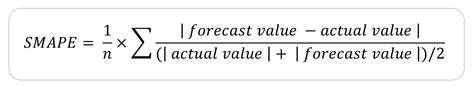

In [26]:
def smape(actual, predicted):
    """Menghitung sMAPE antara nilai aktual dan prediksi."""
    numerator = abs(actual - predicted)
    denominator = (abs(actual) + abs(predicted)) / 2
    smape_values = 100 * (numerator / denominator)
    smape_values[denominator == 0] = 0  # Tangani kasus denominator nol
    return smape_values.mean()

# Hitung sMAPE untuk masing-masing model
smape_mamdani = smape(df['house price of unit area'], df['Model Mamdani'])
smape_sugeno = smape(df['house price of unit area'], df['Model Sugeno'])

# Tampilkan hasil
print(f"sMAPE Model Mamdani: {smape_mamdani:.2f}%")
print(f"sMAPE Model Sugeno: {smape_sugeno:.2f}%")

sMAPE Model Mamdani: 45.48%
sMAPE Model Sugeno: 25.96%


### MAE (Mean Absolute Error)

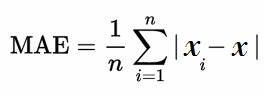

In [27]:
def mae(acutal,predicted):
  return np.mean(np.abs(acutal-predicted))

print(f"Mean Abosulte Error Mamdani: {mae(df['house price of unit area'],df['Model Mamdani'])}")
print(f"Mean Abosulte Error Sugeno: {mae(df['house price of unit area'],df['Model Sugeno'])}")

Mean Abosulte Error Mamdani: 15.436217142040112
Mean Abosulte Error Sugeno: 9.17712662473045


# Kesimpulan

Berdasarkan hasil evaluasi kedua model di atas menggunakan Symmetric Mean Absolute Percentage Error (SMAPE) dan Mean Absolute Error (MAE),
dapat disimpulkan bahwa model Sugeno memiliki performa yang lebih baik dibandingkan dengan model Mamdani.

# Membangun Aplikasi Fuzzy Model Mamdani

In [28]:
import time
import sys

# Fungsi animasi
def animation():
    download_symbols = ["|", "/", "-", "\\"]
    for _ in range(20):  # Ulangi selama 20 iterasi
        for symbol in download_symbols:
            sys.stdout.write(f"\rMemproses {symbol}")
            sys.stdout.flush()
            time.sleep(0.2)  # Menunggu 0.2 detik untuk setiap simbol

#Program Utama
def mamdani_fuzzy():
  print("="*50)
  print("Program Fuzzy Mamdani".center(50))
  print("="*50)
  house_age = float(input("Masukkan usia rumah (tahun): "))
  distance = float(input("Masukkan jarak rumah ke MRT (meter): "))

  #Animasi
  animation()

  #Inferensi Fuzzy
  output = fuzzy_inference(house_age, distance)
  output2 = max(output, key=output.get)

  #Defuzzyfikasi
  crisp_output = defuzzyfikasi(output)

   # Output hasil defuzzyfikasi
  print("  ")
  print("=" * 50)
  print(f"Hasil defuzzyfikasi (output crisp): {crisp_output:.2f}")
    # Menentukan kategori berdasarkan nilai maksimum
  if output2 == "Mahal":
    print("Kategori Harga: Mahal")
  elif output2 == "Sedang":
    print("Kategori Harga: Sedang")
  else:
    print("Kategori Harga: Murah")
  print("=" * 50)

  #Opsi Tindakan
  print("\nApa yang ingin Anda lakukan selanjutnya?")
  print("1. Simpan hasil ke file")
  print("2. Proses data baru")
  print("3. Keluar dari program")
  choice = input("Pilihan Anda (1/2/3): ")

  if choice == "1":
    # Simpan hasil ke file
    filename = input("Masukkan nama file untuk menyimpan hasil: ")
    try:
        with open(filename, "w") as file:
            file.write(f"Usia Rumah (tahun): {house_age}\n")
            file.write(f"Jarak ke Pusat Kota (meter): {distance}\n")
            file.write(f"Hasil Defuzzyfikasi (output crisp): {crisp_output:.2f}\n")
            if output2 == "Mahal":
              file.write(f"Kategori Harga: Mahal\n")
            elif output2 == "Sedang":
              file.write(f"Kategori Harga: Sedang\n")
            else:
              file.write(f"Kategori Harga: Murah\n")
        print(f"Hasil telah disimpan ke file '{filename}'.")
    except Exception as e:
        print(f"Terjadi kesalahan saat menyimpan file: {e}")
  elif choice == "2":
        import os
        os.system('cls')
        mamdani_fuzzy()
  elif choice == "3":
        print("Terima kasih telah menggunakan program ini. Sampai jumpa!")
  else:
        print("Pilihan tidak valid. Program Interrupt.")


In [29]:
mamdani_fuzzy()

              Program Fuzzy Mamdani               
Masukkan usia rumah (tahun): 2
Masukkan jarak rumah ke MRT (meter): 100
Memproses \  
Hasil defuzzyfikasi (output crisp): 72.27
Kategori Harga: Mahal

Apa yang ingin Anda lakukan selanjutnya?
1. Simpan hasil ke file
2. Proses data baru
3. Keluar dari program
Pilihan Anda (1/2/3): 3
Terima kasih telah menggunakan program ini. Sampai jumpa!


# Membangun Aplikasi Fuzzy Model Sugeno

In [30]:
#Program Utama
def sugeno_fuzzy():
  print("="*50)
  print("Program Fuzzy Sugeno".center(50))
  print("="*50)
  house_age = float(input("Masukkan usia rumah (tahun): "))
  distance = float(input("Masukkan jarak rumah ke MRT (meter): "))

  #Animasi
  animation()

  #Inferensi Fuzzy
  output = fuzzy_inference(house_age, distance)
  output2 = max(output, key=output.get)

   # Output hasil defuzzyfikasi
  print("  ")
  print("=" * 50)
  print(f"Hasil prediksi weighted_average: {prediksi_dengan_model_sugeno(house_age, distance):.2f}")
    # Menentukan kategori berdasarkan nilai maksimum
  if output2 == "Mahal":
    print("Kategori Harga: Mahal")
  elif output2 == "Sedang":
    print("Kategori Harga: Sedang")
  else:
    print("Kategori Harga: Murah")
  print("=" * 50)

  #Opsi Tindakan
  print("\nApa yang ingin Anda lakukan selanjutnya?")
  print("1. Simpan hasil ke file")
  print("2. Proses data baru")
  print("3. Keluar dari program")
  choice = input("Pilihan Anda (1/2/3): ")

  if choice == "1":
    # Simpan hasil ke file
    filename = input("Masukkan nama file untuk menyimpan hasil: ")
    try:
        with open(filename, "w") as file:
            file.write(f"Usia Rumah (tahun): {house_age}\n")
            file.write(f"Jarak ke Pusat Kota (meter): {distance}\n")
            file.write(f"Hasil Defuzzyfikasi (weight average): {prediksi_dengan_model_sugeno(house_age, distance):.2f}\n")
            if output2 == "Mahal":
              file.write(f"Kategori Harga: Mahal\n")
            elif output2 == "Sedang":
              file.write(f"Kategori Harga: Sedang\n")
            else:
              file.write(f"Kategori Harga: Murah\n")
        print(f"Hasil telah disimpan ke file '{filename}'.")
    except Exception as e:
        print(f"Terjadi kesalahan saat menyimpan file: {e}")
  elif choice == "2":
        import os
        os.system('cls')
        sugeno_fuzzy()
  elif choice == "3":
        print("Terima kasih telah menggunakan program ini. Sampai jumpa!")
  else:
        print("Pilihan tidak valid. Program Interrupt.")



In [31]:
sugeno_fuzzy()

               Program Fuzzy Sugeno               
Masukkan usia rumah (tahun): 2
Masukkan jarak rumah ke MRT (meter): 100
Memproses \  
Hasil prediksi weighted_average: 46.00
Kategori Harga: Mahal

Apa yang ingin Anda lakukan selanjutnya?
1. Simpan hasil ke file
2. Proses data baru
3. Keluar dari program
Pilihan Anda (1/2/3): 3
Terima kasih telah menggunakan program ini. Sampai jumpa!
